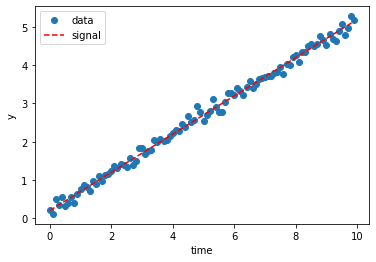

21:39 bilby INFO    : Running for label 'linear_regression_unknown_noise', output will be saved to 'outdir-7'
21:39 bilby INFO    : Search parameters:
21:39 bilby INFO    :   m = Uniform(minimum=0, maximum=5, name='m', latex_label='m', unit=None, boundary=None)
21:39 bilby INFO    :   c = Uniform(minimum=-2, maximum=2, name='c', latex_label='c', unit=None, boundary=None)
21:39 bilby INFO    :   sigma = 0.1
21:39 bilby INFO    : Single likelihood evaluation took 6.925e-05 s






0it [00:00, ?it/s]

21:39 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'unif', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': None, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': None, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 2.0, 'facc': 0.5, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x1c1b93cc50>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None}
21:39 bilby INFO    : Checkpoint every n_check_point = 9000000
21:39 bilby INFO    : Using dynesty version 1.0.0






59it [00:00, 588.24it/s, bound:0 ncall:562 eff:10.5% logz=-inf+/-0.17 dlogz:inf>0.10]



405it [00:00, 783.22it/s, bound:0 ncall:1101 eff:36.8% logz=-487875.55+/-0.18 dlogz:491225.403>0.10]



650it [00:00, 983.59it/s, bound:0 ncall:1805 eff:36.0% logz=-113135.98+/-0.18 dlogz:113210.424>0.10]



836it [00:00, 1145.07it/s, bound:0 ncall:2576 eff:32.5% logz=-43812.78+/-0.19 dlogz:44319.491>0.10] 



1000it [00:00, 1205.16it/s, bound:0 ncall:3439 eff:29.1% logz=-20641.75+/-0.19 dlogz:20757.471>0.10]



1156it [00:00, 1102.26it/s, bound:0 ncall:4766 eff:24.3% logz=-11898.36+/-0.19 dlogz:12113.468>0.10]



1293it [00:00, 929.99it/s, bound:0 ncall:6333 eff:20.4% logz=-7928.98+/-0.19 dlogz:8107.620>0.10]   



1410it [00:01, 751.20it/s, bound:0 ncall:8182 eff:17.2% logz=-5469.66+/-0.20 dlogz:5547.380>0.10]



1507it [00:01, 631.72it/s, bound:0 ncall:10137 eff:14.9% logz=-4334.91+/-0.20 dlogz:4419.695>0.10]



1589it [00:01, 535.92it/s, bound:0 ncall:12151 eff:13.1% logz=-3723.80+/-0.20 dl

21:39 bilby INFO    : Writing checkpoint file outdir-7/linear_regression_unknown_noise_resume.pickle



6863it [00:05, 1166.95it/s, bound:25 ncall:25145 eff:29.3% logz=65.84+/-0.20 dlogz:0.000>0.10]



21:39 bilby INFO    : Sampling time: 0:00:05.103392
21:39 bilby INFO    : Summary of results:
nsamples: 7363
log_noise_evidence:    nan
log_evidence: 65.837 +/-  0.204
log_bayes_factor:    nan +/-  0.204



In [13]:
#!/usr/bin/env python
"""
An example of how to use bilby to perform parameter estimation for
non-gravitational wave data. In this case, fitting a linear function to
data with background Gaussian noise with unknown variance.

"""
from __future__ import division
import bilby
import numpy as np
import matplotlib.pyplot as plt

# A few simple setup steps
label = 'linear_regression_unknown_noise'
outdir = 'outdir-7'
bilby.utils.check_directory_exists_and_if_not_mkdir(outdir)


# First, we define our "signal model", in this case a simple linear function
def model(time, m, c):
    return time * m + c


# Now we define the injection parameters which we make simulated data with
injection_parameters = dict(m=0.5, c=0.2)

# For this example, we'll inject standard Gaussian noise
sigma = 0.1

# These lines of code generate the fake data. Note the ** just unpacks the
# contents of the injection_parameters when calling the model function.
sampling_frequency = 10
time_duration = 10
time = np.arange(0, time_duration, 1 / sampling_frequency)
N = len(time)
data = model(time, **injection_parameters) + np.random.normal(0, sigma, N)

# We quickly plot the data to check it looks sensible
fig, ax = plt.subplots()
ax.plot(time, data, 'o', label='data')
ax.plot(time, model(time, **injection_parameters), '--r', label='signal')
ax.set_xlabel('time')
ax.set_ylabel('y')
ax.legend()
# fig.savefig('{}/{}_data.png'.format(outdir, label))
plt.show()
plt.close()

injection_parameters.update(dict(sigma=sigma))

# Now lets instantiate the built-in GaussianLikelihood, giving it
# the time, data and signal model. Note that, because we do not give it the
# parameter, sigma is unknown and marginalised over during the sampling
likelihood = bilby.core.likelihood.GaussianLikelihood(time, data, model)

priors = dict()
priors['m'] = bilby.core.prior.Uniform(0, 5, 'm')
# priors['c'] = bilby.core.prior.DeltaFunction(0.2,'c')
priors['c'] = bilby.core.prior.Uniform(-2, 2, 'c')
# priors['sigma'] = bilby.core.prior.Uniform(0, 10, 'sigma')
priors['sigma'] = bilby.core.prior.DeltaFunction(0.1, 'sigma')

# And run sampler
result = bilby.run_sampler(
    likelihood=likelihood, priors=priors, sampler='dynesty', npoints=500,
    sample='unif', injection_parameters=injection_parameters, outdir=outdir,
    label=label)



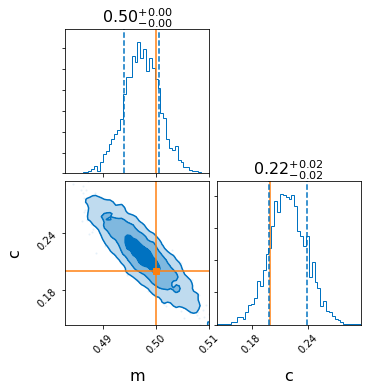

In [14]:
result.plot_corner(save=False);